In [79]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

Populating the interactive namespace from numpy and matplotlib


In [80]:
import calc_enrich
reload(calc_enrich)
from calc_enrich import calc_del_U
from calc_enrich import stages_per_cascade
from calc_enrich import N_product_by_alpha
from calc_enrich import N_waste_by_alpha
from calc_enrich import machines_per_enr_stage
from calc_enrich import machines_per_strip_stage
from calc_enrich import product_per_enr_stage
from calc_enrich import waste_per_strip_stage
from calc_enrich import Npc_from_Nstages
from calc_enrich import Nwc_from_Nstages
from calc_enrich import machines_per_cascade
from calc_enrich import allowed_feed_per_stage

For a type of centrifuge and some cascade guidelines, design the cascade
Start at nat U, enrich to 3.5%, 
Use IR-1 machines (Inst Sci Intl Security, IAEA 2014)

In [81]:
# centrifuge params 
#omega = 64000
#d = 0.1  # m 
#Z = 2.0   # m
#F_m_hrs = 70 # grams/hr  
#T = 320.0   # K
#cut = 0.5
eff = 1.0 # centrifuge efficiency

d = 0.15  # m 
Z = 1.0   # m
F_m_hrs = 15*60*60/(1e3) # grams/hr  
T = 320.0# K
cut = 0.5
omega = 485/(d/2)

# cascade params
Nfc = 0.035
Npc = 0.90
Nwc = 0.003
Fc_month = 739 #kg/month

# The feed enrichment to be used when using a cascade designed for LEU to produce HEU.
Nfc_mod = 0.035
Fc_month_mod = Fc_month #kg/month
#Fc_month_mod = 46 #kg/month

#unit conversions
kg_sec2kg_month = 30.4*24*60*60
v_a = omega * (d/2.0)
F_m = F_m_hrs/(60*60*1000.0)
Fc = Fc_month/kg_sec2kg_month
Fc_mod = Fc_month_mod/kg_sec2kg_month

# Comparison numbers (not needed for calculations)
del_U_th_yr = 1.1 #swu/yr
del_U_obs_yr = 0.71 #Swu/yr
del_U_th = del_U_th_yr/(365.25*24*60*60) #kgSWU/sec
del_U_obs = del_U_obs_yr/(365.25*24*60*60)

Pc_month = 77 #kg/month
Pc = Pc_month/kg_sec2kg_month


In [82]:
alpha, del_U, del_U_yr = calc_del_U(v_a, Z, d, F_m, T, cut, eff)
print "del_U is", del_U, " alpha is ", alpha
#n_enrich_s, n_strip_s= stages_per_cascade(alpha, Nfc, Npc, Nwc)
#print "number of enrich, strip stages is ", n_enrich_s, n_strip_s, alpha
#print del_U*60*60*24*365.25, del_U_th

#n_cf = machines_per_cascade(del_U, Npc, Nwc, Fc, Pc)
#print "number machines per cascade ideal", n_cf

del_U is 3.1939942861e-07  alpha is  1.34782845204


In [83]:
# Calculate the desired number of enrichment stages and machines per stage by ending
# the stages when there is less than an integer machine
Nfs = Nfc
Fs = Fc

enrich_stages = []
int_stages = True
n_stage_enr = 0
print "stage, #mach,    Feed,          Product,       feed assay,     product assay"
while (int_stages == True):
    if (n_mach_enr >=1):
        n_mach_enr = round(machines_per_enr_stage(alpha, del_U, Fs))
        Nps = N_product_by_alpha(alpha, Nfs)
        Ps = product_per_enr_stage(alpha, Nfs, Nps, Fs)
        enrich_stages.append([n_stage_enr, n_mach_enr])
        if (n_stage_enr == 1):
            W_enr1 = Fs - Ps
            Nw_enr1 = (Fs*Nfs - Ps*Nps)/W_enr1
        print n_stage_enr, n_mach_enr, Fs, Ps,  Nfs, Nps
        Nfs = Nps
        Fs = Ps
        n_stage_enr+=1
    if (n_mach_enr <= 1):
        int_stages = False
        
print "feed for cascade (kg/mon)" , Fc*kg_sec2kg_month
print "product of cascade (kg/mon)" , Fs*kg_sec2kg_month
print "achieved product assay", Nps
print "Number of stages is ", n_stage_enr

stage, #mach,    Feed,          Product,       feed assay,     product assay
0 53.0 0.000281356603314 0.000142390918713 0.035 0.0466066071804
1 27.0 0.000142390918713 7.23496163549e-05 0.0466066071804 0.0618156118956
2 14.0 7.23496163549e-05 3.69526109975e-05 0.0618156118956 0.0815631329271
3 7.0 3.69526109975e-05 1.90004778843e-05 0.0815631329271 0.106900350574
4 4.0 1.90004778843e-05 9.85348616961e-06 0.106900350574 0.138917950192
5 2.0 9.85348616961e-06 5.1648014167e-06 0.138917950192 0.178607328324
6 1.0 5.1648014167e-06 2.74283160484e-06 0.178607328324 0.226651387046
feed for cascade (kg/mon) 739.0
product of cascade (kg/mon) 7.20421178001
achieved product assay 0.226651387046
Number of stages is  7


In [84]:
epsilon = alpha - 1.0
F_strip = W_enr1
Nf_strip = Nw_enr1
print "Feed for strip (kg/mon)", F_strip*kg_sec2kg_month
# Consider the zeroth stage of cascade to be on enrich side (iterate from 0), 
# then iterate from 1 for strip side
print "stage, #mach,       Feed,    W_strip,   Nf_strip,   Nw_strip"
strip_stages = []
int_stages = True
n_stage_str = 0
while (int_stages == True):
    n_mach_s= round(machines_per_strip_stage(alpha, del_U, F_strip))
    if (n_mach_s <= 1):
        int_stages = False
    Nw_strip = N_waste_by_alpha(alpha, Nf_strip)
    W_strip = waste_per_strip_stage(alpha, Nf_strip, Nw_strip, F_strip)
    strip_stages.append([-1*(n_stage_str+1),n_mach_s])
    print n_stage_str, n_mach_s, F_strip, W_strip, Nf_strip, Nw_strip
    F_strip = W_strip
    Nf_strip = Nw_strip
    n_stage_str+=1

print "waste of cascade (kg/mon)" , W_strip*kg_sec2kg_month


Feed for strip (kg/mon) 183.967683123
stage, #mach,       Feed,    W_strip,   Nf_strip,   Nw_strip
0 13.0 7.00413023586e-05 4.68254758904e-05 0.0308963673756 0.0231073125044
1 9.0 4.68254758904e-05 3.13681772537e-05 0.0231073125044 0.017246952155
2 6.0 3.13681772537e-05 2.10453723511e-05 0.017246952155 0.0128533114848
3 4.0 2.10453723511e-05 1.41357315471e-05 0.0128533114848 0.00956804836177
4 3.0 1.41357315471e-05 9.50274844864e-06 0.00956804836177 0.00711643393499
5 2.0 9.50274844864e-06 6.39227629777e-06 0.00711643393499 0.00528964005821
6 1.0 6.39227629777e-06 4.30196539969e-06 0.00528964005821 0.00392992941903
waste of cascade (kg/mon) 11.2993702402


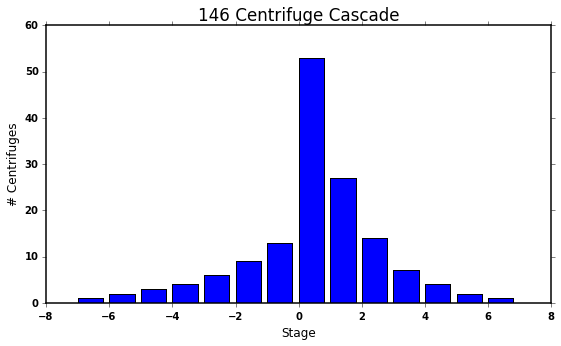

In [85]:
all_stages = np.array(strip_stages+enrich_stages)
n_centrifuges = np.sum(all_stages[:,1], axis=0)

bar_width = 0.8
bar_res = plt.bar(all_stages[:,0], all_stages[:,1], bar_width)

plt.xlabel('Stage')
plt.ylabel('# Centrifuges')
plt.title(str(int(n_centrifuges)) + " Centrifuge Cascade")
plt.legend()

plt.tight_layout()
plt.show()


Given the ideal cascade above, how does the product enrichment change with different feed enrichment?
How much new product is produced given the new feed rate?

In [86]:
### THIS SHOULD GET A PRODUCT ASSAY THE SAME AS ABOVE (22%)
## BECAUSE THE n_stage_enr is off by 1
Npc_mod = Npc_from_Nstages(alpha, Nfc_mod, n_stage_enr)
Nwc_mod = Nwc_from_Nstages(alpha, Nfc_mod, n_stage_str)

print "Cascade optimized for feed assay= ", Nfc
print "When used with feed assay= ", Nfc_mod, " product assay= ", Npc_mod, " tails assay= ", Nwc_mod 
print "NEnrich", n_stage_enr, " NStrip " , n_stage_str

Cascade optimized for feed assay=  0.035
When used with feed assay=  0.035  product assay=  0.292767461059  tails assay=  0.0031676923413
NEnrich 7  NStrip  7


In [87]:
# starting feed stages and enrichment are starting cascade values
Nfs = Nfc_mod
Fs_mod = Fc_mod
print "stage, Feed (kg/mon),   Product (kg/mon),    feed assay,     product assay"
enrich_stages = []
for i in range(0, n_stage_enr):  
    Nps = N_product_by_alpha(alpha, Nfs)
    Ps_mod = product_per_enr_stage(alpha, Nfs, Nps, Fs_mod)
    if (i == 1):
        W_enr1_mod = Fs_mod - Ps_mod
        Nw_enr1_mod = (Fs_mod*Nfs - Ps_mod*Nps)/W_enr1
    print i, Fs_mod*kg_sec2kg_month, Ps_mod*kg_sec2kg_month,  Nfs, Nps
    Nfs = Nps
    Fs_mod = Ps_mod
print "product of cascade (kg/mon)" , Fs_mod*kg_sec2kg_month

stage, Feed (kg/mon),   Product (kg/mon),    feed assay,     product assay
0 739.0 373.998291456 0.035 0.0466066071804
1 373.998291456 190.030608333 0.0466066071804 0.0618156118956
2 190.030608333 97.0582499417 0.0618156118956 0.0815631329271
3 97.0582499417 49.9058951917 0.0815631329271 0.106900350574
4 49.9058951917 25.8807726337 0.106900350574 0.138917950192
5 25.8807726337 13.5656608091 0.138917950192 0.178607328324
6 13.5656608091 7.20421178001 0.178607328324 0.226651387046
product of cascade (kg/mon) 7.20421178001


In [88]:
F_strip_mod = W_enr1_mod
Nf_strip = Nw_enr1_mod

print "stage,    Feed (kg/mon),    W_strip (kg/mon),   feed assay (strip),   waste assay (strip)"
strip_stages = []
for i in range(1, n_stage_str):  
    Nw_strip = N_waste_by_alpha(alpha, Nf_strip)
    W_strip_mod = waste_per_strip_stage(alpha, Nf_strip, Nw_strip, F_strip_mod)
    strip_stages.append([-1*i,n_mach_s])
    print i, F_strip_mod*kg_sec2kg_month, W_strip_mod*kg_sec2kg_month, Nf_strip, Nw_strip
    F_strip_mod = W_strip_mod
    Nf_strip = Nw_strip
    
print "waste of cascade (kg/mon)" , W_strip_mod*kg_sec2kg_month


stage,    Feed (kg/mon),    W_strip (kg/mon),   feed assay (strip),   waste assay (strip)
1 183.967683123 122.989921955 0.0308963673756 0.0231073125044
2 122.989921955 82.3903996475 0.0231073125044 0.017246952155
3 82.3903996475 55.2769332025 0.017246952155 0.0128533114848
4 55.2769332025 37.1283470522 0.0128533114848 0.00956804836177
5 37.1283470522 24.9595389653 0.00956804836177 0.00711643393499
6 24.9595389653 16.7896972327 0.00711643393499 0.00528964005821
waste of cascade (kg/mon) 16.7896972327


Design a Cascade For a Fixed Number of Centrifuges
(But need more info to determine whether to adjust feed rate or waste assay to reach target)

In [89]:
f_assay = 0.1975
p_assay = 0.9
n_mach = 164

# Calculate the desired number of enrichment stages and machines per stage by ending
# the stages when there is less than an integer machine

f_enrich_stages = []
int_stages = True
n_stage_enr = 0
Fs = Fc
Nfs = f_assay
cur_mach_tot = 0
remain_mach = n_mach
print "stage, #mach, Feed (kg/mon),   Product (kg/mon),    feed assay,     product assay"
while ((Nfs < p_assay) and (int_stages == True) and (int(remain_mach) > 0)):
    print "remain_mach is ", remain_mach
    n_mach_enr = round(machines_per_enr_stage(alpha, del_U, Fs))
    # if the last stage doesn't have enough centrifuges then a compromise is needed
    # assume that machines are already operating at max possible feed rate, and 
    # so some of the product from stage N-1 will be siphoned off to reduce the total
    # feed into the last stage to be manageable. (this may not be a valid assumption)
#    remain_mach = n_mach - cur_mach_tot
    if (n_mach_enr >= remain_mach):
        Fs = allowed_feed_per_stage(alpha, del_U, remain_mach)
        cur_mach_tot += remain_mach
        int_stages = False
        cur_num = remain_mach
        remain_mach = 0
    else:
        remain_mach -= n_mach_enr
        cur_mach_tot += n_mach_enr
        cur_num = n_mach_enr
        if (n_mach_enr ==1):
            int_stages = False

        
#    if (n_mach_enr <= 1):
#        int_stages = False
    Nps = N_product_by_alpha(alpha, Nfs)
    Ps = product_per_enr_stage(alpha, Nfs, Nps, Fs)
    print n_stage_enr, cur_num, Fs*kg_sec2kg_month, Ps*kg_sec2kg_month,  Nfs, Nps
    f_enrich_stages.append([n_stage_enr, cur_num])
    if (n_stage_enr == 1):
        W_enr1 = Fs - Ps
        Nw_enr1 = (Fs*Nfs - Ps*Nps)/W_enr1
    Nfs = Nps
    Fs = Ps
    n_stage_enr+=1
if (Nps < p_assay):
    print "WARNING: Not enough centrifuges, Max achievable enrichment ", Nps
print "Total enriching machines ", cur_mach_tot, " Max enrich ", Nfs, "  Qty (kg/mon)", Fs*kg_sec2kg_month


stage, #mach, Feed (kg/mon),   Product (kg/mon),    feed assay,     product assay
remain_mach is  164
0 53.0 739.0 394.883216073 0.1975 0.249084949853
remain_mach is  111.0
1 28.0 394.883216073 214.547718451 0.249084949853 0.308956179675
remain_mach is  83.0
2 15.0 214.547718451 118.801910385 0.308956179675 0.376012243745
remain_mach is  68.0
3 9.0 118.801910385 67.1698728674 0.376012243745 0.448183133781
remain_mach is  59.0
4 5.0 67.1698728674 38.8205205756 0.448183133781 0.522604692049
remain_mach is  54.0
5 3.0 38.8205205756 22.9385949225 0.522604692049 0.596035972613
remain_mach is  51.0
6 2.0 22.9385949225 13.8470923658 0.596035972613 0.665403864482
remain_mach is  49.0
7 1.0 13.8470923658 8.52597599561 0.665403864482 0.728290133814
Total enriching machines  116.0  Max enrich  0.728290133814   Qty (kg/mon) 8.52597599561


In [90]:
epsilon = alpha - 1.0
F_strip = W_enr1
Nf_strip = Nw_enr1

# Consider the zeroth stage of cascade to be on enrich side (iterate from 0), 
# then iterate from 1 for strip side
print "stage, #mach,       Feed (kg/mon),    W_strip (kg/mon),   feed assay (strip),   waste assay (strip)"
f_strip_stages = []
int_stages = True
n_stage_str = 0
if (remain_mach > 0):
    while ((int_stages == True) and (int(remain_mach) > 0)):
        print "remain_mach is ", remain_mach
        #    if ((int_stages == True) and (int(remain_mach) > 0)):
        n_mach_s= round(machines_per_strip_stage(alpha, del_U, F_strip))
        # if the last stage doesn't have enough centrifuges then a compromise is needed
        # assume that machines are already operating at max possible feed rate, and 
        # so some of the product from stage N-1 will be siphoned off to reduce the total
        # feed into the last stage to be manageable. (this may not be a valid assumption)
        if (n_mach_s >= remain_mach) or (n_mach_s == 1):
            print "remaining machines is ", remain_mach, " n for stage is ", n_mach_s
            F_strip = allowed_feed_per_stage(alpha, del_U, remain_mach)
            n_to_add = (remain_mach if (n_mach_s >= remain_mach) else n_mach_s)
            print "number to add last time around is ", n_to_add
            cur_mach_tot += n_to_add
            int_stages = False
            cur_num = n_to_add
            remain_mach = 0
        else:
            cur_mach_tot += n_mach_s
            remain_mach -= n_mach_s
            cur_num = n_mach_s
        Nw_strip = N_waste_by_alpha(alpha, Nf_strip)
        W_strip = waste_per_strip_stage(alpha, Nf_strip, Nw_strip, F_strip)
        f_strip_stages.append([-1*(n_stage_str+1), cur_num])
        print n_stage_str, cur_num, F_strip*kg_sec2kg_month, W_strip*kg_sec2kg_month, Nf_strip, Nw_strip
        F_strip = W_strip
        Nf_strip = Nw_strip
        n_stage_str+=1
else:
    print "Insufficent centrifuges to have a stripping section"

print "Total Machines ", cur_mach_tot
print "waste of cascade (kg/mon)" , W_strip*kg_sec2kg_month, " assay is ", Nw_strip
print "Feed for strip (kg/mon) ", F_strip*kg_sec2kg_month

stage, #mach,       Feed (kg/mon),    W_strip (kg/mon),   feed assay (strip),   waste assay (strip)
remain_mach is  48.0
0 13.0 180.335497623 115.95259805 0.177855292194 0.138304889938
remain_mach is  35.0
1 8.0 115.95259805 75.3530757431 0.138304889938 0.106411126243
remain_mach is  27.0
2 5.0 75.3530757431 49.3869949041 0.106411126243 0.0811793233344
remain_mach is  22.0
3 4.0 49.3869949041 32.5853410395 0.0811793233344 0.0615185034119
remain_mach is  18.0
4 2.0 32.5853410395 21.6110961829 0.0615185034119 0.0463789850583
remain_mach is  16.0
5 2.0 21.6110961829 14.3897108059 0.0463789850583 0.0348269927201
remain_mach is  14.0
remaining machines is  14.0  n for stage is  1.0
number to add last time around is  1.0
6 1.0 194.1553152 129.668047801 0.0348269927201 0.0260736776088
Total Machines  151.0
waste of cascade (kg/mon) 129.668047801  assay is  0.0260736776088
Feed for strip (kg/mon)  129.668047801


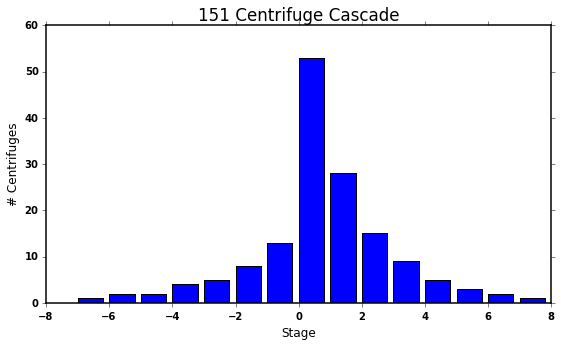

array([[ -1.,  13.],
       [ -2.,   8.],
       [ -3.,   5.],
       [ -4.,   4.],
       [ -5.,   2.],
       [ -6.,   2.],
       [ -7.,   1.],
       [  0.,  53.],
       [  1.,  28.],
       [  2.,  15.],
       [  3.,   9.],
       [  4.,   5.],
       [  5.,   3.],
       [  6.,   2.],
       [  7.,   1.]])

In [91]:
f_all_stages = np.array(f_strip_stages + f_enrich_stages)
f_n_centrifuges = np.sum(f_all_stages[:,1], axis=0)

bar_width = 0.8
bar_res = plt.bar(f_all_stages[:,0], f_all_stages[:,1], bar_width)

plt.xlabel('Stage')
plt.ylabel('# Centrifuges')
plt.title(str(int(f_n_centrifuges)) + " Centrifuge Cascade")
plt.legend()

plt.tight_layout()
plt.show()
f_all_stages

Given the cascade designed by fixed number of centrifuges, how does the product enrichment change with different feed enrichment?
How much new product is produced given the new feed rate?

In [92]:
Npc_mod = Npc_from_Nstages(alpha, Nfc_mod, n_stage_enr)
Nwc_mod = Nwc_from_Nstages(alpha, Nfc_mod, n_stage_str)

print "Cascade optimized for ", n_mach , " centrifuges and feed assay= ", Nfc
print "When used with feed assay= ", Nfc_mod, " product assay= ", Npc_mod, " tails assay= ", Nwc_mod 
print "NEnrich", n_stage_enr, " NStrip " , n_stage_str

Cascade optimized for  164  centrifuges and feed assay=  0.035
When used with feed assay=  0.035  product assay=  0.369548923006  tails assay=  0.0031676923413
NEnrich 8  NStrip  7
